一、 具体问题：评估四个开发区的综合发展水平

问题描述：

假设某市政府需要对下辖的四个高新技术开发区（A区, B区, C区, D区）在过去五年的发展水平进行一次综合评估，以便确定未来的资源倾斜方向。
评估体系包含四个核心指标（均为正向指标，即越大越好）：

GDP增长率 (%)
高新技术企业数量 (家)
吸引投资额 (亿元)
专利申请数量 (件)

我们收集到了四个开发区过去五年的数据，如下表：

开发区	指标	2018	2019	2020	2021	2022
A区	GDP增长率	6.5	6.8	7.2	7.5	7.8
企业数量	120	135	155	180	210
吸引投资	50	55	62	70	80
专利数量	200	220	250	290	340
B区	GDP增长率	7.0	7.2	7.1	7.3	7.4
企业数量	100	110	125	145	170
吸引投资	60	65	70	78	85
专利数量	180	190	210	240	280
C区	GDP增长率	6.0	6.2	6.8	7.8	8.5
企业数量	80	95	115	140	175
吸引投资	40	48	58	72	90
专利数量	150	170	200	250	310
D区	GDP增长率	8.0	7.8	7.5	7.6	7.7
企业数量	150	160	170	185	200
吸引投资	70	72	75	80	82
专利数量	250	260	275	295	320
核心目标：
对这四个开发区进行综合排名。

为什么传统方法有困难？

指标权重难以确定：GDP增长率和企业数量，哪个更重要？权重设为主观性太强。
数据量太小：每个序列只有5个数据点，用复杂的统计模型不合适。
动态趋势的比较：我们不仅关心数值大小，更关心发展趋势和潜力。比如C区虽然起点低，但增长势头很猛。
灰色关联分析 (GRA) 正是解决这类多指标、小样本、动态过程评估问题的利器。

二、 GRA的解决思路：“寻找最像‘理想生’的那个学生”

定义“理想生” (参考序列)：
我们构建一个虚拟的、在所有指标上都表现最好的“完美开发区”。它的数据序列，就是每年所有四个区中对应指标的最大值。
计算相似度 (灰色关联系数)：
对于每个真实的开发区（A, B, C, D），我们分别计算它的四个指标序列与“理想生”对应指标序列的几何形状相似度。
综合评分 (灰色关联度)：
将一个开发区所有四个指标的相似度得分求一个平均值，就得到了这个区的最终综合得分 (灰色关联度)。
排名：
综合得分越高的开发区，说明其整体发展趋势与“理想最优”趋势越接近，排名就越靠前。

C:\Users\AUSA\AppData\Local\Temp\ipykernel_4748\3624476445.py:29: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  reference_sequence = panel_data.groupby(level=1, axis=1).max()


--- 理想最优参考序列 ---
       Enterprises  GDP  Investment  Patents
2018        150.0  8.0        70.0    250.0
2019        160.0  7.8        72.0    260.0
2020        170.0  7.5        75.0    275.0
2021        185.0  7.8        80.0    295.0
2022        210.0  8.5        90.0    340.0

--- 开发区综合发展水平排名 ---
   Grey Relational Grade  Rank
D               0.668089   1.0
B               0.667924   2.0
C               0.617848   3.0
A               0.537037   4.0


C:\Users\AUSA\AppData\Local\Temp\ipykernel_4748\3624476445.py:73: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  reference_sequence = panel_data.groupby(level=1, axis=1).max()


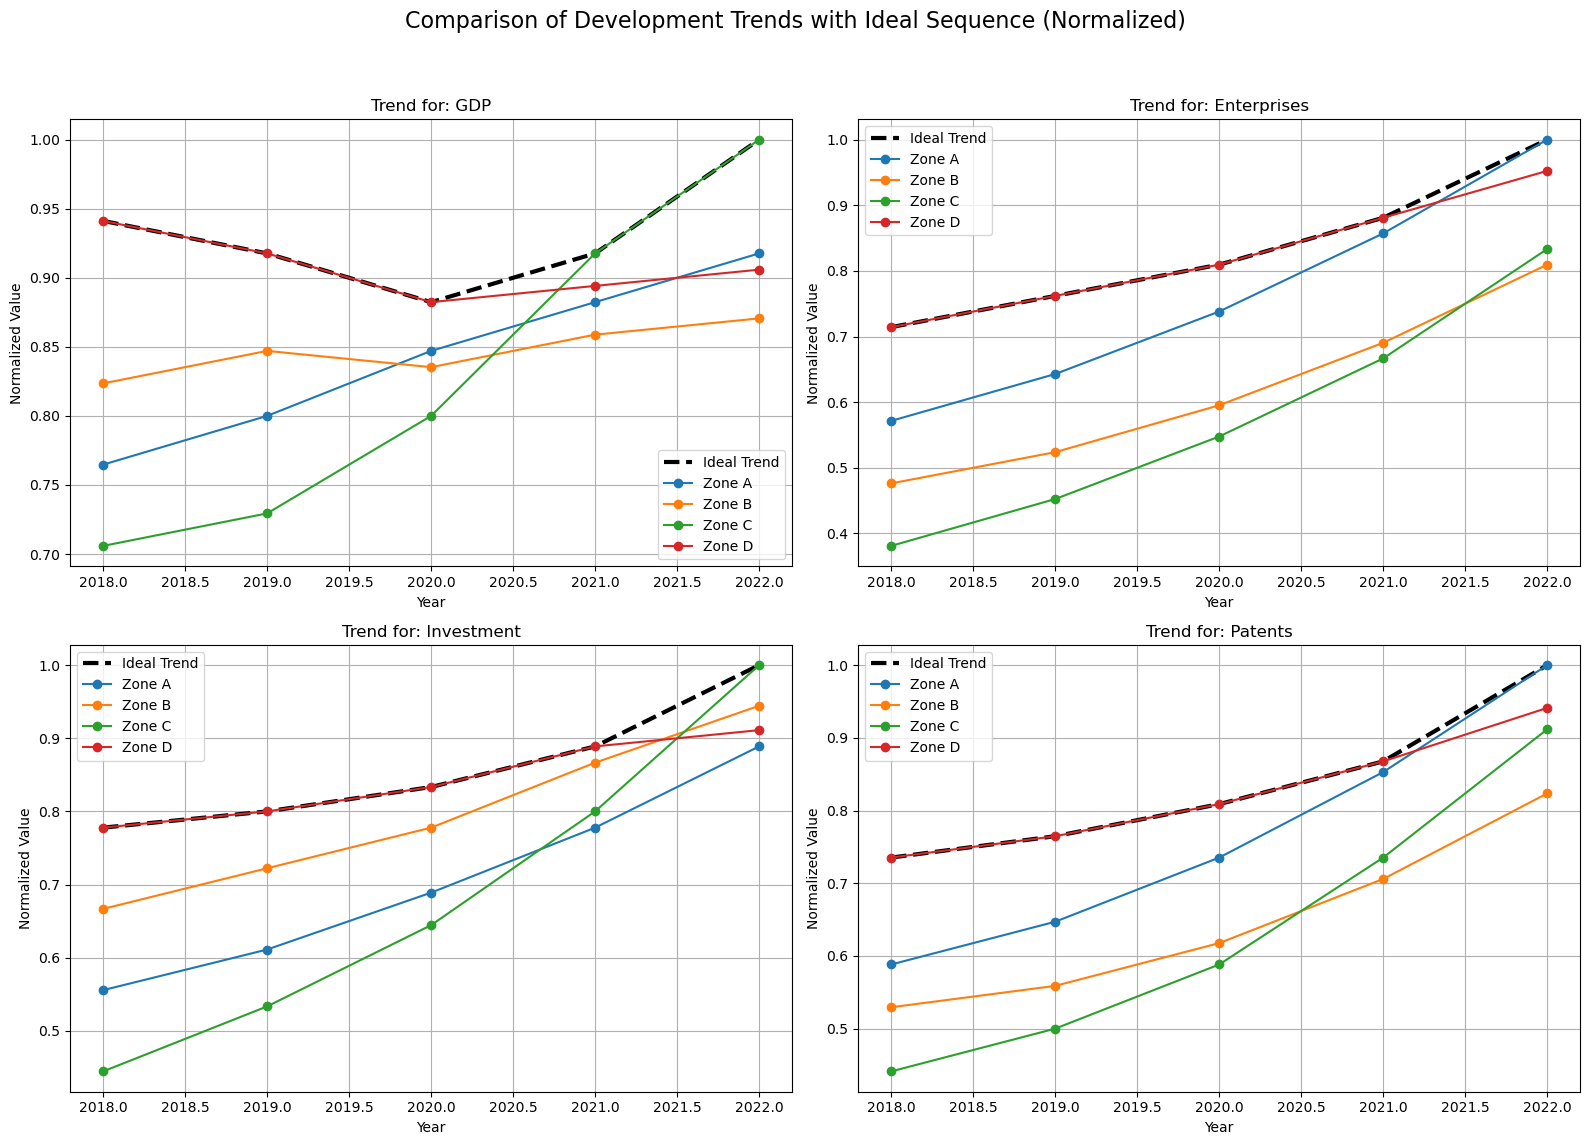

In [2]:
import pandas as pd
import numpy as np

# --- 1. 数据准备 ---
data = {
    'A': {'GDP': [6.5, 6.8, 7.2, 7.5, 7.8], 'Enterprises': [120, 135, 155, 180, 210], 'Investment': [50, 55, 62, 70, 80], 'Patents': [200, 220, 250, 290, 340]},
    'B': {'GDP': [7.0, 7.2, 7.1, 7.3, 7.4], 'Enterprises': [100, 110, 125, 145, 170], 'Investment': [60, 65, 70, 78, 85], 'Patents': [180, 190, 210, 240, 280]},
    'C': {'GDP': [6.0, 6.2, 6.8, 7.8, 8.5], 'Enterprises': [80, 95, 115, 140, 175], 'Investment': [40, 48, 58, 72, 90], 'Patents': [150, 170, 200, 250, 310]},
    'D': {'GDP': [8.0, 7.8, 7.5, 7.6, 7.7], 'Enterprises': [150, 160, 170, 185, 200], 'Investment': [70, 72, 75, 80, 82], 'Patents': [250, 260, 275, 295, 320]}
}

# 将数据转换为DataFrame方便处理
dfs = {}
for zone, metrics in data.items():
    dfs[zone] = pd.DataFrame(metrics, index=range(2018, 2023))

# --- 2. 灰色关联分析函数 ---
def grey_relational_analysis(dataframes, rho=0.5):
    """
    执行灰色关联分析
    :param dataframes: 一个包含多个DataFrame的字典，key为对象名，DataFrame为指标数据
    :param rho: 分辨系数，通常取0.5
    :return: 包含关联度和排名的DataFrame
    """
    # 1. 构建参考序列 (理想最优序列)
    # 将所有df按列（指标）拼接
    panel_data = pd.concat(dataframes.values(), keys=dataframes.keys(), axis=1)
    # 对每个指标（列），在所有开发区中找到每年的最大值
    reference_sequence = panel_data.groupby(level=1, axis=1).max()
    print("--- 理想最优参考序列 ---\n", reference_sequence)

    # 2. 数据无量纲化 (均值化处理)
    normalized_dfs = {}
    for name, df in dataframes.items():
        normalized_dfs[name] = df / df.mean()
    normalized_reference = reference_sequence / reference_sequence.mean()
    
    # 3. 计算灰色关联系数
    relational_coefficients = {}
    for name, df_norm in normalized_dfs.items():
        # 计算差值序列
        diff_sequence = np.abs(df_norm - normalized_reference)
        min_diff = diff_sequence.min().min() # 全局最小值
        max_diff = diff_sequence.max().max() # 全局最大值
        
        # 计算关联系数
        coeffs = (min_diff + rho * max_diff) / (diff_sequence + rho * max_diff)
        relational_coefficients[name] = coeffs
        
    # 4. 计算灰色关联度 (对所有指标和年份求平均)
    relational_degrees = {}
    for name, coeffs_df in relational_coefficients.items():
        # 这里我们对所有指标的关联系数求平均值，得到每个开发区的总关联度
        relational_degrees[name] = coeffs_df.values.mean()
        
    # 5. 结果整理与排名
    result_df = pd.DataFrame.from_dict(relational_degrees, orient='index', columns=['Grey Relational Grade'])
    result_df['Rank'] = result_df['Grey Relational Grade'].rank(ascending=False)
    
    return result_df.sort_values(by='Rank')

# --- 3. 执行分析并打印结果 ---
final_ranking = grey_relational_analysis(dfs)

print("\n--- 开发区综合发展水平排名 ---")
print(final_ranking)

# --- 4. 可视化每个开发区的发展趋势 (与理想序列对比) ---
import matplotlib.pyplot as plt

# 构建理想序列
panel_data = pd.concat(dfs.values(), keys=dfs.keys(), axis=1)
reference_sequence = panel_data.groupby(level=1, axis=1).max()

# 对所有数据进行归一化以便于在同一张图上比较
all_data = pd.concat(dfs.values())
normalized_dfs_vis = {name: df/all_data.max() for name, df in dfs.items()}
normalized_ref_vis = reference_sequence / all_data.max()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison of Development Trends with Ideal Sequence (Normalized)', fontsize=16)
axes = axes.flatten()

metrics = ['GDP', 'Enterprises', 'Investment', 'Patents']
for i, metric in enumerate(metrics):
    ax = axes[i]
    # 绘制理想曲线
    ax.plot(normalized_ref_vis.index, normalized_ref_vis[metric], 'k--', linewidth=3, label='Ideal Trend')
    # 绘制每个区的曲线
    for zone, df_norm in normalized_dfs_vis.items():
        ax.plot(df_norm.index, df_norm[metric], 'o-', label=f'Zone {zone}')
    ax.set_title(f'Trend for: {metric}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

参考序列：

程序首先会打印出那个虚拟的“完美开发区”每年的指标数据。这是我们衡量其他所有开发区的“黄金标准”。

最终排名：

输出的表格会清晰地给出每个开发区的灰色关联度 (Grey Relational Grade) 和排名 (Rank)。
你可能会发现一个有趣的结果：某个指标的绝对值最高的开发区（比如D区），其综合排名不一定是第一。
例如，C区的关联度可能非常高，因为它虽然起点低，但其增长曲线的形状（发展势头）与“理想最优”曲线非常相似，这在灰色关联分析中被认为是高度相关的。
这体现了GRA重趋势、轻数值的独特视角。

可视化图表：

四张子图分别展示了四个指标的发展趋势。
黑色虚线代表“理想生”的轨迹。
我们的任务就是用眼睛判断，哪条彩色的线，其形状、走势与黑色虚线最“贴近”、最“平行”？ 你的视觉判断结果，应该会和代码计算出的灰色关联度排名高度一致。
例如，在GDP图上，你会看到C区的曲线（绿色）虽然前期在下方，但后期的上升斜率几乎和理想曲线（黑色）一样陡峭，显示出强劲的追赶势头。而D区的曲线（紫色）虽然一直处于高位，但其形状可能比较平缓，与理想曲线的“持续高增长”形态反而不那么相似。

结论：

灰色关联分析通过将复杂的、多指标的评估问题转化为一个几何形状的相似度比较问题，成功地回避了权重设置的主观性和小样本数据的统计难题。它提供了一个动态的、全局的视角来评估系统的优劣，最终的排名结果不仅反映了当前的“存量”优势，更深刻地揭示了未来的“增量”潜力。这使其成为数模竞赛中解决评估、决策、优选类问题的有力武器。